In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

plt.style.use('/home/llr/ilc/shi/code/Plot_style/cepc.mplstyle')
figSize = (8, 6)
SamplingLayer=30
ECAL_layers=120
Si=0.75
CellSize=5.0
Threshold=0.1
NN="Threshold0.1"
# Read Data
#Config = ("SumE", "NHits","RecoE_cheat")
#Config = ("SumE", "NHits","RecoE_DGCNN0","RecoE_DGCNN1","RecoE_DGCNN2")
#Config = ("RecoE_MLP_Huber0.03","RecoE_MLP_Huber0.05","RecoE_MLP_Huber0.07")
#Config = ("RecoE_MLP_lr1e-4","RecoE_MLP_lr3e-4","RecoE_MLP_lr1e-3")
#Config = ("RecoE_MLP_drop0.01","RecoE_MLP_drop0.03","RecoE_MLP_drop0.05","RecoE_MLP_drop0.07","RecoE_MLP_drop0.1")
#Config = ("RecoE_MLP_[256]","RecoE_MLP_[128]")
#Config = ("SumE", "NHits","RecoE_DGCNN3")
#Config = ("SumE", "NHits","RecoE_cheat","RecoE_MLP0","RecoE_DGCNN0")
#Config = ("SumE", "RecoE_MLP_GELU","RecoE_MLP_Softsign","RecoE_MLP_Res_PReLU")
#Config = ("SumE","NHits","RecoE_MLP","RecoE_MLP_BasicPerformance")
#Config = ("RecoE_MLP_MSE","RecoE_MLP_RelativeMSE","RecoE_MLP_Huber")
#Config = ("SumE","NHits","RecoE_MLP_Layer[64,32,16,8]")
#Config = ("SumE", "NHits")
Config = ("SumE", "NHits","RecoE_MLP","RecoE_DGCNN_KNN8_WD1e-8")
WD=("1e-8","1e-7","1e-5","1e-4")
#Config = tuple(f"RecoE_MLP_{NN}_WD{c}" for c in WD)


##DGCNN
#Config = ("RecoE_DGCNN_WD1e-9","RecoE_DGCNN_WD1e-8","RecoE_DGCNN_WD1e-7","RecoE_DGCNN_WD1e-6","RecoE_DGCNN_WD1e-5")
#Config = ("RecoE_DGCNN_[256]","RecoE_DGCNN_[128]")
colors = ['blue', 'green', 'red','orange','purple','brown','cyan','magenta']
dataPath = f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si{Si:.2f}mm_layer{SamplingLayer}_in{ECAL_layers}/Reco_Results"

#V1 and V2
# fileNames = (f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si{Si:.2f}mm_layer30_in120/Reco_Results/SumE_Fit.csv",
#              f"/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF0/gamma/Validate/Merged_X{CellSize:.1f}mm_Y{CellSize:.1f}mm_Si{Si:.2f}mm_layer30_in60/Reco_Results/SumE_Fit.csv")
# Config = ("GeoV2","GeoV1")

particleEnergy = []
meanGamma = []
meanGammaErr = []
peakGamma = []
peakGammaErr = []
resGamma = []
resGammaErr = []
valLoss = []

for i_config in range(len(Config)):
    fileName = os.path.join(dataPath, f"{Config[i_config]}_Fit.csv")
# for fileName in fileNames:
    #fileName = os.path.join(dataPath, f"{Config[i_config]}_Fit_Threshold{Threshold}.csv")
    df = pd.read_csv(fileName)
    particleEnergy.append(df["ParticleEnergy"].to_numpy())
    meanGamma.append(df["Mean_Gamma"].to_numpy())
    meanGammaErr.append(df["Mean_Gamma_Error"].to_numpy())
    peakGamma.append(df["Peak_Gamma"].to_numpy())
    peakGammaErr.append(df["Peak_Gamma_Error"].to_numpy())
    resGamma.append(df["Res_Gamma"].to_numpy())
    resGammaErr.append(df["Res_Gamma_Error"].to_numpy())
    if "Best_Val_Loss" in df.columns:
        valLoss.append(df["Best_Val_Loss"].iloc[0])
    else:
        valLoss.append(float(-1))
        print(f"⚠️ Warning: 'Best_Val_Loss' not found in {fileName}")

    print(f"Loaded {fileName}")


⚠️ Warning: 'Best_Val_Loss' not found in /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/SumE_Fit_Threshold0.1.csv
Loaded /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/SumE_Fit_Threshold0.1.csv
⚠️ Warning: 'Best_Val_Loss' not found in /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/NHits_Fit_Threshold0.1.csv
Loaded /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/NHits_Fit_Threshold0.1.csv
Loaded /home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/RecoE_MLP_Fit_Threshold0.1.csv


FileNotFoundError: [Errno 2] No such file or directory: '/home/llr/ilc/shi/data/SiWECAL-Prototype/Simu2025-06/CONF3/gamma/Validate/Merged_X5.0mm_Y5.0mm_Si0.75mm_layer30_in120/Reco_Results/RecoE_DGCNN_Hits_Fit_Threshold0.1.csv'

Validation Loss [-1.0, -1.0, np.float64(0.0008606051359633)]


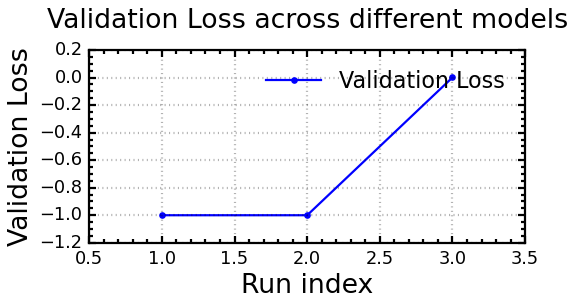

In [ ]:
print("Validation Loss", valLoss)
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(valLoss)+1), valLoss, marker='o', label="Validation Loss")
plt.xlabel("Run index")
plt.ylabel("Validation Loss")
plt.title("Validation Loss across different models")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Config: SumE
Config: NHits
Config: RecoE_MLP


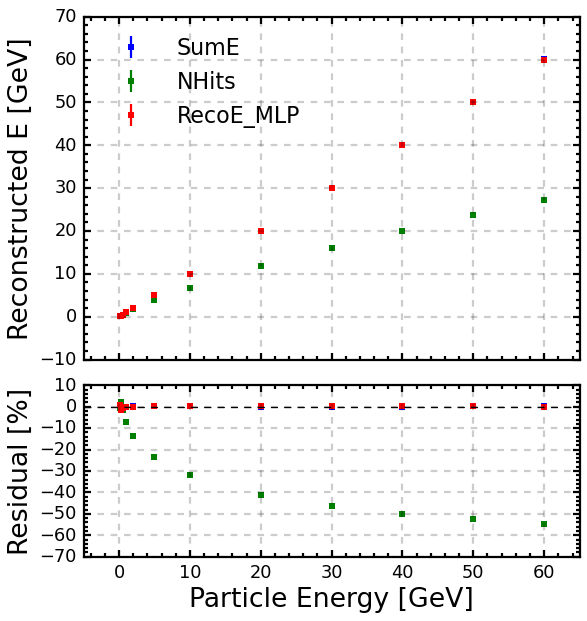

Config: SumE
Config: NHits
Config: RecoE_MLP


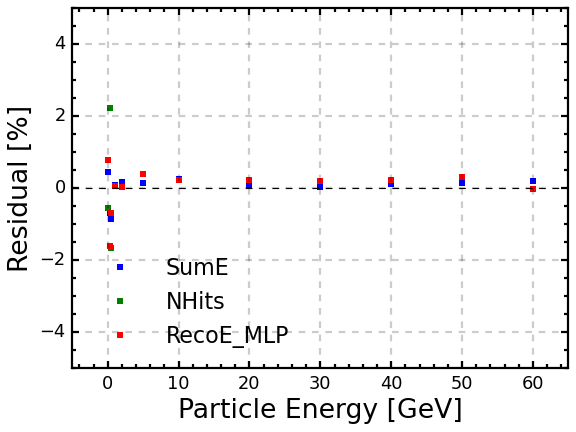

In [ ]:

# Linearity and Resolution
def linear_func(x, a, b):
    return a * x + b

def fitAndResidualRatio(x, y, fit_range=(0,70)):
    """Linear fit and return coefficients, fit values, and relative residuals."""
    a0 = (y[-1] - y[0]) / (x[-1] - x[0])
    b0 = y[0]
    p0 = [a0, b0]
    upper_bound = [5*a0, np.inf]
    lower_bound = [0, -np.inf]  # Ensure slope is non-negative
    mask = (x >= fit_range[0]) & (x <= fit_range[1])
    coeffs, cov = curve_fit(linear_func, x[mask], y[mask], p0=p0, bounds=(lower_bound, upper_bound),sigma=x[mask], absolute_sigma=True)
    fitVals = linear_func(x, *coeffs)
    residualRatio = (y - fitVals) / fitVals
    return coeffs, fitVals, residualRatio
fitGamma,ResGamma = [],[]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(figSize[0], figSize[1]*1.5), 
        sharex=True,gridspec_kw={'height_ratios':[1, 0.5],'hspace': 0.1})
MarkerSize = 10
for i_c in range(len(Config)):
    print(f"Config: {Config[i_c]}")
    if Config[i_c] == "NHits":
        fit_range = (0, 0.8)
    else:
        fit_range = (0, 70)
    #Calib
    coeff,fitVals,residualRatio = fitAndResidualRatio(particleEnergy[i_c], peakGamma[i_c], fit_range=fit_range)
    peakGamma[i_c] = (peakGamma[i_c]-coeff[1])/(coeff[0])
    peakGammaErr[i_c] = peakGammaErr[i_c]/(coeff[0])
    coeff,fitVals,residualRatio = fitAndResidualRatio(particleEnergy[i_c], peakGamma[i_c], fit_range=fit_range)
    residualRatio = (peakGamma[i_c] - particleEnergy[i_c]) / particleEnergy[i_c]
    fitGamma.append(fitVals)
    ResGamma.append(residualRatio)
    # Gamma
    ax1.errorbar(particleEnergy[i_c], peakGamma[i_c], yerr=peakGammaErr[i_c],
        fmt='s', capsize=4, label=Config[i_c], color=colors[i_c]
    )
    #ax1.plot(particleEnergy[i_c], fitGamma[i_c], '-', color=colors[i_c])
    ax1.set_ylabel("Reconstructed E [GeV]")
    #ax1.set_ylim(-100, 1300)
    ax1.set_xlim(-5, 65)
    #ax1.set_title("Linearity")
    ax1.legend(loc='upper left')
    ax1.grid(True, linestyle='--', alpha=0.2)

    ax2.plot(particleEnergy[i_c], ResGamma[i_c]*100, 's', label='Gamma', color=colors[i_c])
    #ax2.set_ylim(-5, 5)
    ax2.axhline(0, color='black', lw=1, linestyle='--')
    ax2.set_xlabel("Particle Energy [GeV]")
    ax2.set_ylabel("Residual [%]")
    ax2.grid(True, linestyle='--', alpha=0.2)
plt.show()

plt.figure(figsize=figSize)

for i_c in range(len(Config)):
    print(f"Config: {Config[i_c]}")
    # 假设 fitGamma 和 ResGamma 已经计算好
    plt.plot(particleEnergy[i_c], ResGamma[i_c]*100, 's', label=Config[i_c], 
             color=colors[i_c])

plt.axhline(0, color='black', lw=1, linestyle='--')
plt.xlabel("Particle Energy [GeV]")
plt.ylabel("Residual [%]")
plt.xlim(-5, 65)
plt.ylim(-5, 5)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(loc='lower left')
plt.show()


/tmp/ipykernel_17906/2291241151.py:6: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sqrt(E)


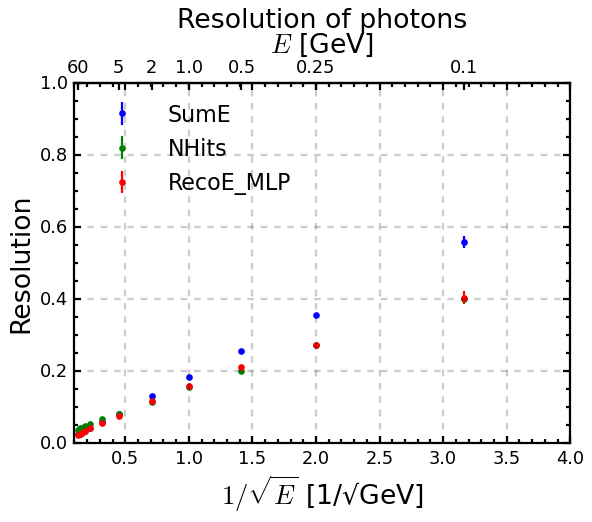

In [ ]:
plt.figure(figsize=figSize)
ax = plt.gca()
def forward(x):  # 下轴(1/sqrt(E)) -> 上轴(E)
    return 1 / (x**2)
def inverse(E):  # 上轴(E) -> 下轴(1/sqrt(E))
    return 1 / np.sqrt(E)
secax = ax.secondary_xaxis("top", functions=(forward, inverse))
secax.set_xlabel(r"$E$ [GeV]")
E_ticks = [0.1, 0.25, 0.5, 1.0, 2, 5, 60]
secax.set_xticks(E_ticks)
secax.set_xticklabels(E_ticks)
secax.xaxis.set_minor_locator(plt.NullLocator())  # 禁用所有次刻度
secax.xaxis.set_tick_params(which='both', top=True, labeltop=True, bottom=False, labelbottom=False)
for i_c in range(len(Config)):
    x_vals = 1 / np.sqrt(particleEnergy[i_c])
    ax.errorbar(x_vals, resGamma[i_c], yerr=resGammaErr[i_c],
                fmt='o', capsize=4, label=Config[i_c], color=colors[i_c])
ax.set_xlabel(r"$1/\sqrt{E}$ [1/√GeV]")
ax.set_ylabel("Resolution")
ax.set_title("Resolution of photons", pad=50)
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.2)
ax.set_xlim(0.1, 4)
ax.set_ylim(0, 1)
plt.show()

    

Config: SumE
y_vals: [0.55908589 0.35491898 0.25474437 0.18331834 0.13062667 0.08193227
 0.05778915 0.04162065 0.03441968 0.03039253 0.02677664 0.02444263]
Config: NHits
y_vals: [0.39962849 0.27147534 0.20003176 0.15506971 0.11451659 0.0813893
 0.06837114 0.05347546 0.04708498 0.04336696 0.04094635 0.03772033]
Config: RecoE_MLP
y_vals: [0.40387064 0.27211444 0.21037775 0.15849496 0.11679726 0.0756915
 0.05639221 0.04128991 0.0333125  0.02962545 0.02664794 0.02369505]


/tmp/ipykernel_17906/2508057150.py:10: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sqrt(E)


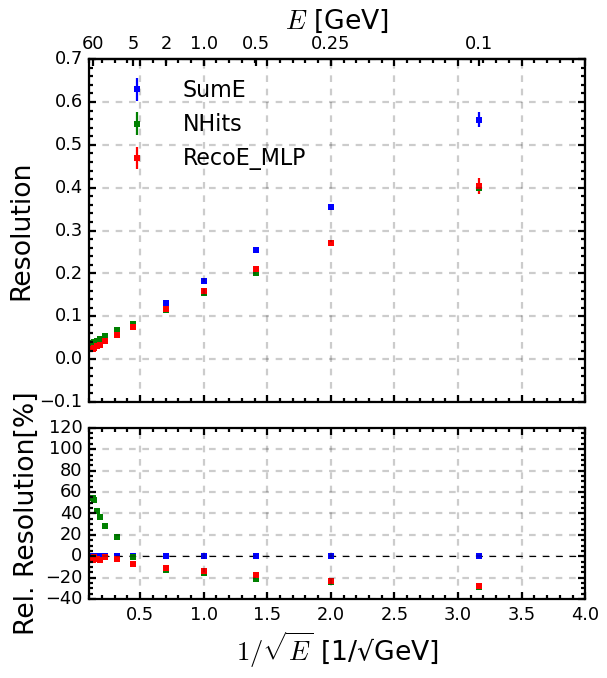

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(figSize[0], figSize[1]*1.5),
    sharex=True, gridspec_kw={'height_ratios': [1, 0.5], 'hspace': 0.1}
)
MarkerSize = 10

def forward(x):
    return 1 / (x**2)
def inverse(E):
    return 1 / np.sqrt(E)
secax = ax1.secondary_xaxis("top", functions=(forward, inverse))
secax.set_xlabel(r"$E$ [GeV]")
E_ticks = [0.1, 0.25, 0.5, 1.0, 2, 5, 60]
secax.set_xticks(E_ticks)
secax.set_xticklabels(E_ticks)
secax.xaxis.set_minor_locator(plt.NullLocator())
secax.xaxis.set_tick_params(which='both', top=True, labeltop=True, bottom=False, labelbottom=False)

x_ref = 1 / np.sqrt(particleEnergy[0])
y_ref = np.array(resGamma[0])
y_ref_err = np.array(resGammaErr[0])

for i_c in range(len(Config)):
    x_vals = 1 / np.sqrt(particleEnergy[i_c])
    y_vals = np.array(resGamma[i_c])
    y_errs = np.abs(np.array(resGammaErr[i_c]))
    ax1.errorbar(x_vals, y_vals, yerr=y_errs,
                 fmt='s', capsize=4, label=Config[i_c],
                 color=colors[i_c])
ax1.set_ylabel("Resolution")
#ax1.set_title("Resolution of photons")
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.2)
ax1.set_xlim(0.1, 4)
for i_c in range(len(Config)):
    x_vals = 1 / np.sqrt(particleEnergy[i_c])
    y_vals = np.array(resGamma[i_c])
    y_errs = np.abs(np.array(resGammaErr[i_c]))
    print(f"Config: {Config[i_c]}")
    print(f"y_vals: {y_vals}")
    if i_c == 0:
        ax2.errorbar(x_vals, np.zeros_like(y_vals), yerr=0,
                     fmt='s', capsize=4, label=f"{Config[i_c]} (ref)",
                     color=colors[i_c])
    else:
        residual = (y_vals - y_ref) / y_ref
        residual_err = np.sqrt((y_errs / y_ref)**2 + (y_ref_err * y_vals / y_ref**2)**2)
        ax2.errorbar(x_vals, residual * 100, yerr=0,
                     fmt='s', capsize=4, label=f"{Config[i_c]} / {Config[0]} - 1",
                     color=colors[i_c])

ax2.axhline(0, color='black', lw=1, linestyle='--')
ax2.set_xlabel(r"$1/\sqrt{E}$ [1/√GeV]")
ax2.set_ylabel("Rel. Resolution[%]")
ax2.set_ylim(-40, 120)
ax2.grid(True, linestyle='--', alpha=0.2)
plt.show()